# **Text Mining & Image Recognition**

## **Laboratorio # 2**

**Instrucciones:** A continuación verá una lista de ejercicios que debe completar para poder entregar la hoja de trabajo #1. Al finalizar, todos sus archivos deben estar contenidos en un archivo ht2-sucarnet.zip. Este archivo debe entregarlo en el link del GES. Por favor cree una carpeta para cada ejercicio que usted realice.

## **Importar Librerías**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

## **Problema #1:**
Desarrolle una función que permita hacer la binarización de una imagen, para realizarlo puede utilizar el enfoque que prefiera.

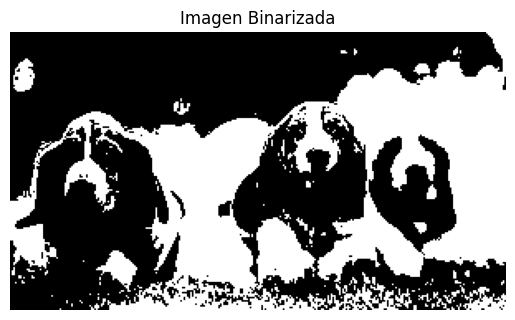

In [4]:
def binarize_image(input_path, output_path, threshold):
    # Abrir la imagen
    img = Image.open(input_path)

    # Convertir la imagen a escala de grises
    gray_img = img.convert("L")

    # Crear una imagen en blanco y negro binarizada
    binarized_img = gray_img.point(lambda p: p > threshold and 255)

    # Guardar la imagen binarizada
    binarized_img.save(output_path)

    # Devolver la imagen binarizada
    return binarized_img

# Ruta de la imagen de entrada y salida
input_image_path = "/content/sample_data/Problema1_L2/perro.jpg"
output_image_path = "/content/sample_data/Problema1_L2/perro_binarizada.jpg"

# Umbral para binarización (ajusta este valor según sea necesario)
threshold_value = 128

# Llamar a la función para binarizar la imagen
imagen_binarizada = binarize_image(input_image_path, output_image_path, threshold_value)

# Mostrar la imagen binarizada utilizando matplotlib
plt.imshow(imagen_binarizada, cmap='gray')
plt.title('Imagen Binarizada')
plt.axis('off')
plt.show()

## **Problema #2:**
Desarrolle una función que dada dos imágenes a color, realice las operaciones SUMA, RESTA, AND, OR , XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla.

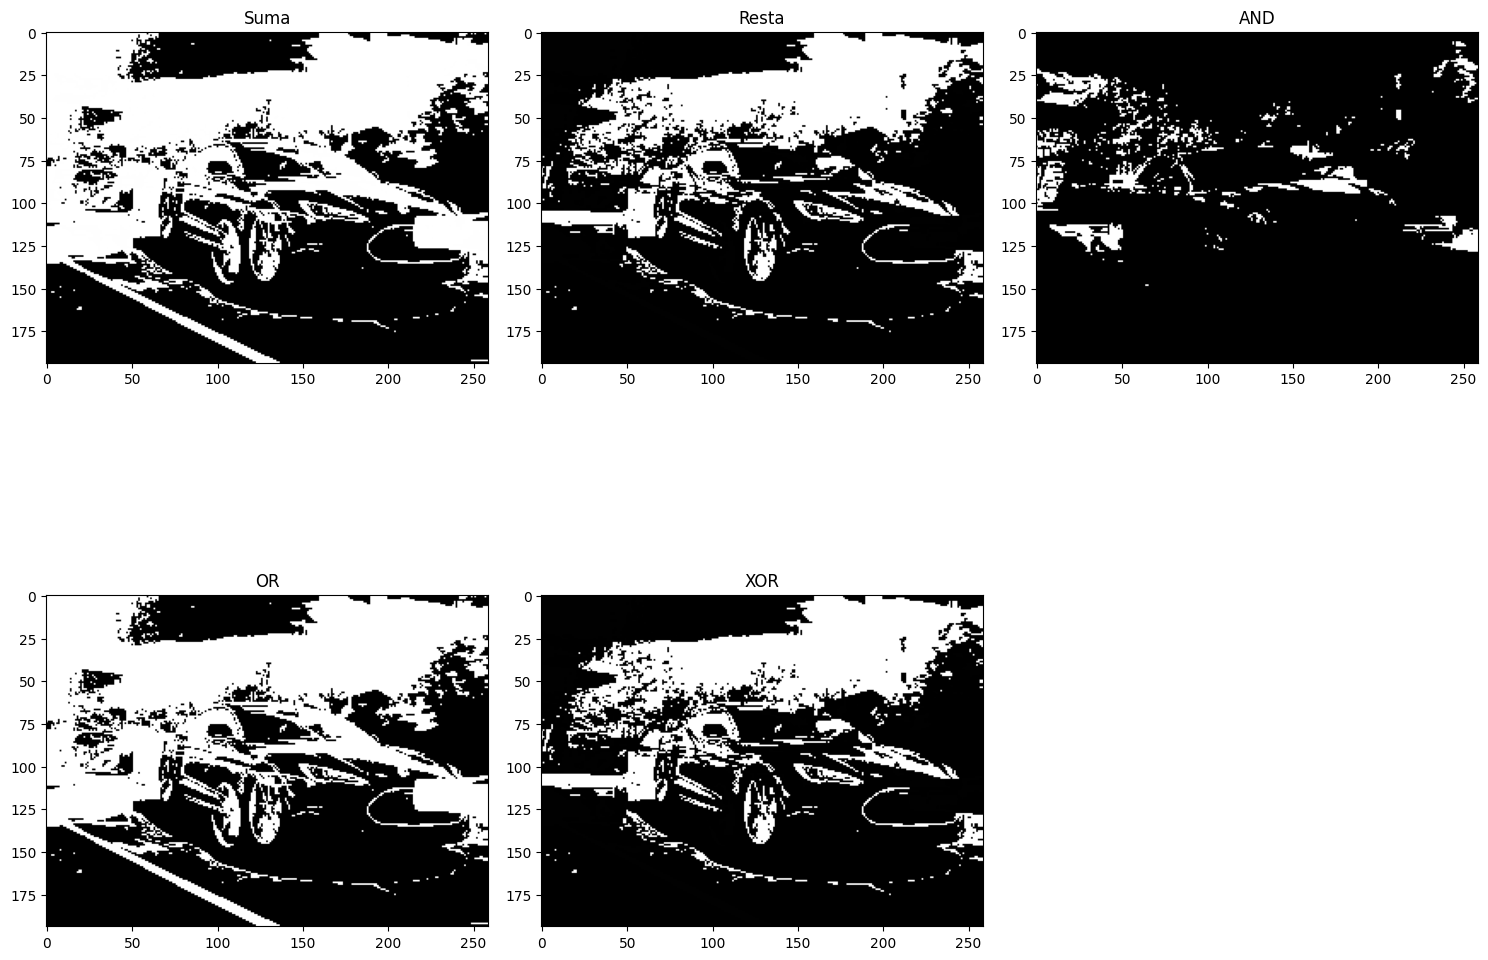

In [14]:
def normalizar_imagen(imagen):
    return np.array(imagen) / 255.0

def operaciones_logicas(imagen1_path, imagen2_path, salida_path=None):
    # Abrir las imágenes
    img1 = Image.open(imagen1_path)
    img2 = Image.open(imagen2_path)

    # Redimensionar las imágenes al mismo tamaño
    tamano_comun = (img1.width, img1.height)
    img1 = img1.resize(tamano_comun)
    img2 = img2.resize(tamano_comun)

    # Convertir imágenes a escala de grises
    img1_gris = img1.convert("L")
    img2_gris = img2.convert("L")

    # Binarizar las imágenes
    umbral = 128
    img1_binarizada = img1_gris.point(lambda p: p > umbral and 255)
    img2_binarizada = img2_gris.point(lambda p: p > umbral and 255)

    # Realizar operaciones lógicas
    suma = Image.fromarray(np.array(img1_binarizada, dtype=np.uint8) + np.array(img2_binarizada, dtype=np.uint8))
    resta = Image.fromarray(np.abs(np.array(img1_binarizada, dtype=np.uint8) - np.array(img2_binarizada, dtype=np.uint8)))
    and_op = Image.fromarray(np.array(img1_binarizada, dtype=np.uint8) & np.array(img2_binarizada, dtype=np.uint8))
    or_op = Image.fromarray(np.array(img1_binarizada, dtype=np.uint8) | np.array(img2_binarizada, dtype=np.uint8))
    xor_op = Image.fromarray(np.abs(np.array(img1_binarizada, dtype=np.uint8) - np.array(img2_binarizada, dtype=np.uint8)))

    # Mostrar las imágenes resultantes
    plt.figure(figsize=(15, 12))
    plt.subplot(2, 3, 1)
    plt.imshow(suma, cmap="gray")
    plt.title('Suma')

    plt.subplot(2, 3, 2)
    plt.imshow(resta, cmap="gray")
    plt.title('Resta')

    plt.subplot(2, 3, 3)
    plt.imshow(and_op, cmap="gray")
    plt.title('AND')

    plt.subplot(2, 3, 4)
    plt.imshow(or_op, cmap="gray")
    plt.title('OR')

    plt.subplot(2, 3, 5)
    plt.imshow(xor_op, cmap="gray")
    plt.title('XOR')

    plt.tight_layout()
    plt.show()

    # Guardar la imagen de salida si se proporciona la ruta
    if salida_path:
        xor_op.save(salida_path)

# Rutas de las imágenes de entrada y salida
imagen1_path = "/content/sample_data/Problema2_L2/tesla1.jpg"
imagen2_path = "/content/sample_data/Problema2_L2/tesla2.jpg"
salida_image_path = "/content/sample_data/Problema2_L2/tesla3.jpg"

# Llamar a la función para realizar las operaciones lógicas y guardar la imagen de salida
operaciones_logicas(imagen1_path, imagen2_path, salida_path=salida_image_path)

## **Problema #3:**
Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

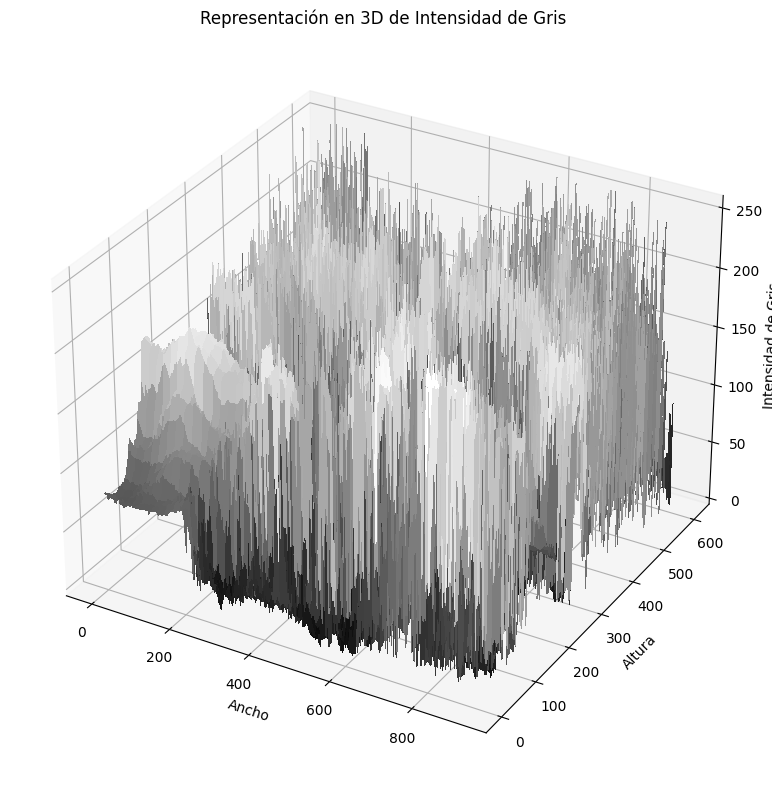

In [19]:
def mostrar_imagen_3d(imagen_gris, titulo):
    # Obtener las dimensiones de la imagen
    altura, ancho = imagen_gris.shape

    # Crear malla de coordenadas
    x = np.linspace(0, ancho, ancho)
    y = np.linspace(0, altura, altura)
    x, y = np.meshgrid(x, y)

    # Obtener valores de intensidad de gris
    z = imagen_gris

    # Crear la figura 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Mostrar la superficie 3D
    ax.plot_surface(x, y, z, cmap='gray', linewidth=0, antialiased=False)

    # Configurar título y etiquetas de los ejes
    ax.set_title(titulo)
    ax.set_xlabel('Ancho')
    ax.set_ylabel('Altura')
    ax.set_zlabel('Intensidad de Gris')

    # Mostrar la figura
    plt.tight_layout()
    plt.show()

# Cargar la imagen en escala de grises
imagen_path = "/content/sample_data/Problema3_L2/leonGrises.jpg"
imagen_gris = Image.open(imagen_path).convert("L")
imagen_gris = np.array(imagen_gris)

# Título de la imagen
titulo = "Representación en 3D de Intensidad de Gris"

# Llamar a la función para mostrar la imagen en 3D con título y tamaño adecuado
mostrar_imagen_3d(imagen_gris, titulo)

## **Problema #4:**
Implemente una función para cada una de las trasformaciones vistas en clase: negativa, lineal, logarítmica y exponencial.


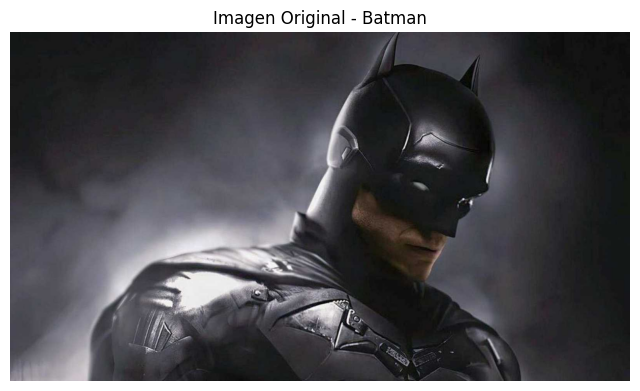

In [21]:
# Cargar la imagen de Batman
image_path_batman = "/content/sample_data/Problema4_L2/batman.jpg"  # Cambiar por la ruta de la imagen de Batman
img_batman = cv2.imread(image_path_batman)

# Mostrar la imagen de Batman
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img_batman, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original - Batman')
plt.axis('off')
plt.show()

In [24]:
# Definir funciones de transformación de imágenes
def transform_negativa(img):
    return 255 - img

def transform_lineal(img, c=1):
    return cv2.convertScaleAbs(img, alpha=c, beta=0)

def transform_logaritmica(img):
    c = 255 / np.log(1 + np.max(img))
    log_image = c * (np.log(img + 1))
    return np.array(log_image, dtype=np.uint8)

def transform_exponencial(img, c=1, gamma=1.2):
    exp_transformed = np.array(255 * (img / 255) ** gamma, dtype=np.uint8)
    return exp_transformed

# Ruta de la imagen de Batman a cargar
img_path_batman = '/content/sample_data/Problema4_L2/batman.jpg'

# Cargar la imagen en escala de grises
img_batman = cv2.imread(img_path_batman, cv2.IMREAD_GRAYSCALE)

# Verificar si se pudo cargar la imagen
if img_batman is None:
    print("No se pudo cargar la imagen.")
else:
    # Aplicar las transformaciones a la imagen de Batman
    img_negativa_batman = transform_negativa(img_batman)
    img_lineal_batman = transform_lineal(img_batman)
    img_logaritmica_batman = transform_logaritmica(img_batman)
    img_exponencial_batman = transform_exponencial(img_batman)

    # Ruta para guardar las imágenes transformadas de Batman
    save_path_batman = '/content/sample_data/Problema4_L2/batman.jpg'

    # Guardar las imágenes transformadas de Batman
    cv2.imwrite(save_path_batman + 'Batman_Negativa.jpg', img_negativa_batman)
    cv2.imwrite(save_path_batman + 'Batman_Lineal.jpg', img_lineal_batman)
    cv2.imwrite(save_path_batman + 'Batman_Logaritmica.jpg', img_logaritmica_batman)
    cv2.imwrite(save_path_batman + 'Batman_Exponencial.jpg', img_exponencial_batman)

    # Imprimir mensaje de éxito para Batman
    print("Imágenes de Batman guardadas exitosamente en", save_path_batman)

Imágenes de Batman guardadas exitosamente en /content/sample_data/Problema4_L2/batman.jpg


<ipython-input-24-6914328efd50>:10: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(img + 1))


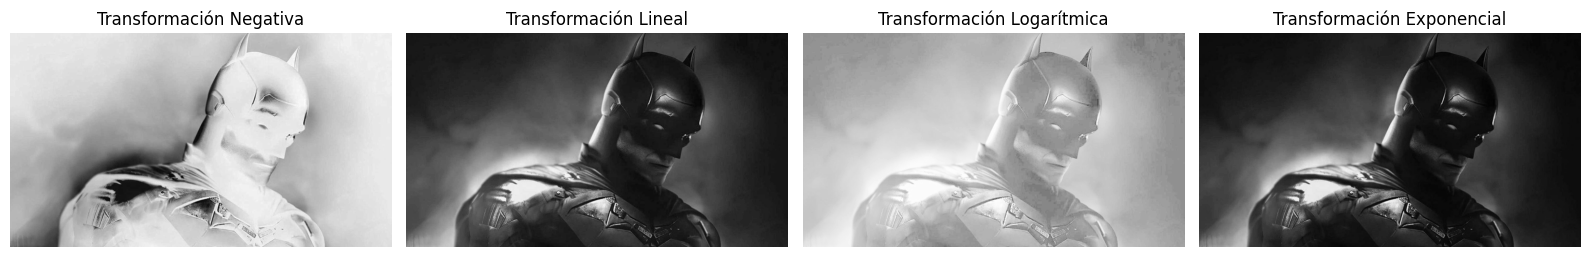

In [26]:
# Cargar las imágenes transformadas de Batman
img_negativa_batman = cv2.imread(save_path_batman + 'Batman_Negativa.jpg', 0)
img_lineal_batman = cv2.imread(save_path_batman + 'Batman_Lineal.jpg', 0)
img_logaritmica_batman = cv2.imread(save_path_batman + 'Batman_Logaritmica.jpg', 0)
img_exponencial_batman = cv2.imread(save_path_batman + 'Batman_Exponencial.jpg', 0)

# Mostrar las imágenes transformadas de Batman en una cuadrícula
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

axs[0].imshow(img_negativa_batman, cmap='gray')
axs[0].set_title('Transformación Negativa')
axs[0].axis('off')

axs[1].imshow(img_lineal_batman, cmap='gray')
axs[1].set_title('Transformación Lineal')
axs[1].axis('off')

axs[2].imshow(img_logaritmica_batman, cmap='gray')
axs[2].set_title('Transformación Logarítmica')
axs[2].axis('off')

axs[3].imshow(img_exponencial_batman, cmap='gray')
axs[3].set_title('Transformación Exponencial')
axs[3].axis('off')

plt.tight_layout()
plt.show()

## **Problema #5:**
Desarrolle una función que dada una imagen a color, cualquier kernel con cualquier dimensión (3X3, 5X5, 7X7, 9X9, 11X11) y cualquier tipo (gaussiano, Sobel, Sharp, unsharp, laplaciano), aplique un filtro de convolución a dicha imagen y muestre la imagen original y la imagen filtrada. Le recomendamos implementar el kernel como un arreglo de numpy

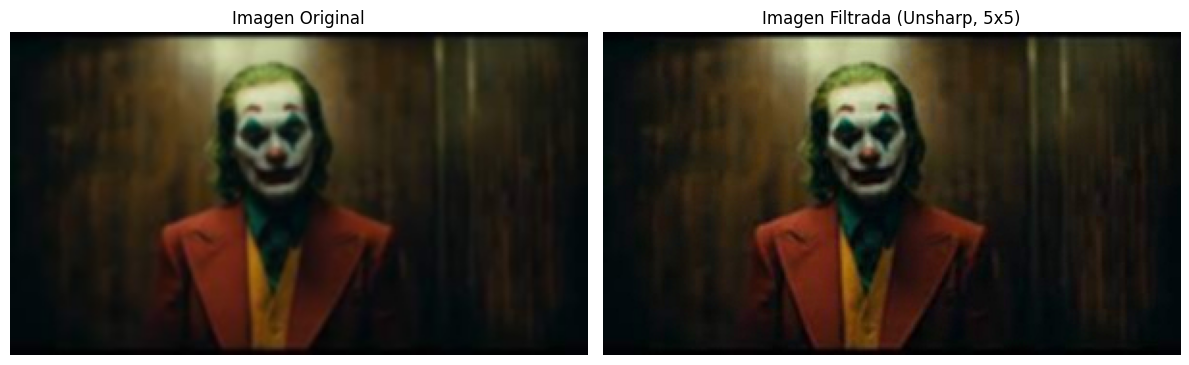

Imagen filtrada guardada exitosamente en /content/sample_data/Problema5_L2/joker.jpg


In [38]:
def aplicar_filtro_convolucion(imagen_path, kernel_type, kernel_size, save_path=None):
    # Cargar la imagen a color
    imagen_original = cv2.imread(imagen_path)

    if imagen_original is None:
        print("No se pudo cargar la imagen.")
        return

    # Definir los kernels según el tipo especificado
    if kernel_type == 'gaussiano':
        kernel = cv2.getGaussianKernel(kernel_size, -1)
        kernel_2d = np.outer(kernel, kernel)
    elif kernel_type == 'sobel':
        kernel_x = cv2.getDerivKernels(1, 0, kernel_size, normalize=True)
        kernel_y = cv2.getDerivKernels(0, 1, kernel_size, normalize=True)
        kernel_2d = np.outer(kernel_x, kernel_y)
    elif kernel_type == 'sharp':
        kernel_2d = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    elif kernel_type == 'unsharp':
        gaussian = cv2.getGaussianKernel(kernel_size, -1)
        kernel_2d = np.outer(gaussian, gaussian) * -1
        kernel_2d[int(kernel_size/2), int(kernel_size/2)] = kernel_2d[int(kernel_size/2), int(kernel_size/2)] + 2
    elif kernel_type == 'laplaciano':
        kernel_2d = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    else:
        print("Tipo de kernel no válido.")
        return

    # Normalizar el kernel
    kernel_2d = kernel_2d / np.sum(kernel_2d)

    # Aplicar el filtro de convolución a la imagen original
    imagen_filtrada = cv2.filter2D(imagen_original, -1, kernel_2d)

    # Mostrar las imágenes original y filtrada
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(imagen_filtrada, cv2.COLOR_BGR2RGB))
    plt.title(f'Imagen Filtrada ({kernel_type.capitalize()}, {kernel_size}x{kernel_size})')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Guardar la imagen filtrada si se proporciona la ruta
    if save_path:
        cv2.imwrite(save_path, imagen_filtrada)
        print("Imagen filtrada guardada exitosamente en", save_path)

# Ruta de la imagen a color
imagen_path_color = '/content/sample_data/Problema5_L2/joker.jpg'

# Parámetros del filtro
kernel_type = 'unsharp'  # Puedes cambiar a 'sobel', 'sharp', 'unsharp', 'laplaciano',gaussiano
kernel_size = 5  # Puedes cambiar el tamaño del kernel (3, 5, 7, 9, 11)

# Ruta para guardar la imagen filtrada (opcional)
save_path = '/content/sample_data/Problema5_L2/joker.jpg'  # Deja en blanco si no deseas guardarla

# Llamar a la función para aplicar el filtro de convolución y mostrar las imágenes
aplicar_filtro_convolucion(imagen_path_color, kernel_type, kernel_size, save_path)

## **Problema #6:**
Investigue que hace el kernel Laplaceano y como este enfoque se diferencia de usar el algoritmo de Canny para la detección de bordes.

## **Kernel Laplaciano: **

El kernel Laplaciano es un operador utilizado en el procesamiento de imágenes para detectar cambios bruscos en la intensidad de los píxeles, que suelen indicar la presencia de bordes en la imagen. Matemáticamente, el kernel Laplaciano calcula la segunda derivada de la intensidad de la imagen en las direcciones x e y. Se aplica una convolución entre el kernel Laplaciano y una vecindad de píxeles en la imagen para resaltar las transiciones abruptas de intensidad. Esta resaltación resulta en la identificación de bordes y detalles significativos.

Sin embargo, el operador Laplaciano es sensible al ruido debido a su alta sensibilidad a pequeñas variaciones en la intensidad. Esto puede llevar a la detección de bordes espurios o poco claros en áreas ruidosas de la imagen. Para mitigar este problema, se puede aplicar una etapa de suavizado previo a la imagen utilizando un filtro Gaussiano, lo que da lugar al Laplaciano del Gaussiano (LoG). El suavizado reduce el ruido y mejora la precisión de la detección de bordes.

## **Algoritmo de Canny: **

El algoritmo de Canny es un método más completo y sofisticado para la detección de bordes en imágenes. A diferencia del kernel Laplaciano, el algoritmo de Canny consta de varios pasos interconectados que brindan un enfoque más robusto para la detección de bordes:

**Suavizado:** Se aplica un filtro Gaussiano a la imagen para reducir el ruido y eliminar detalles irrelevantes.

**Cálculo de Gradientes:** Se calculan las derivadas parciales en las direcciones x e y para obtener la magnitud y dirección del gradiente en cada píxel. Esto permite identificar la ubicación y orientación de los bordes.

**Supresión de no máximos:** Se realiza una supresión de los píxeles que no son máximos en la dirección del gradiente. Esto afinca los bordes al reducir el ancho del borde a un solo píxel.

**Umbralización:** Se aplican umbrales alto y bajo a los valores de magnitud del gradiente. Los píxeles con magnitud del gradiente por encima del umbral alto se consideran bordes fuertes, y aquellos entre los umbrales alto y bajo se consideran bordes débiles.

**Histeresis:** Los píxeles marcados como bordes débiles se mantienen si están conectados a píxeles fuertes. Esto ayuda a eliminar los bordes débiles y a conectar los bordes fragmentados.

**Diferencia: **entre el kernel Laplaciano y el algoritmo de Canny radica en la exhaustividad y la robustez. El algoritmo de Canny ofrece un enfoque más completo al abordar la suavización, el cálculo de gradientes, la supresión de no máximos, la umbralización y la histeresis. Esto resulta en una detección de bordes más precisa, especialmente en entornos ruidosos. En contraste, el kernel Laplaciano es más simple y puede resultar en detecciones menos confiables debido a su sensibilidad al ruido y la falta de etapas adicionales para refinar los bordes detectados.

## **Problema Extra:**
Implemente una función que sugiera si una imagen en escala de grises requiere o no la ecualización de su histograma, para esto puede utilizar un valor entre 0 a 1, donde 0 significaría que la imagen no requiere ecualización y 1  significaría que la imagen requiere ecualización fuertemente, si el valor
es mayor a 0.5 su función debe realizar la ecualización de histograma vista en clase.

Sugerencia: La imagen requiere ecualización de histograma.


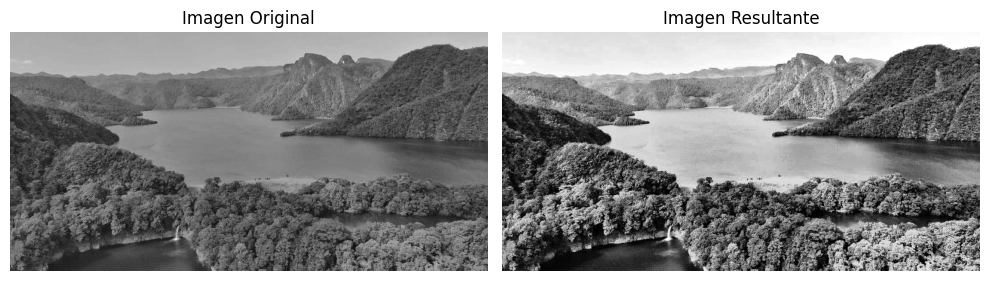

In [41]:
def sugerir_y_ecualizar_histograma(imagen_path, threshold=0.5):
    # Cargar la imagen en escala de grises
    img = cv2.imread(imagen_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print("No se pudo cargar la imagen.")
        return

    # Calcular el histograma de la imagen
    hist, _ = np.histogram(img, bins=np.arange(256))
    hist = hist / hist.sum()  # Normalizar el histograma

    # Calcular el acumulado del histograma
    acumulado_hist = np.cumsum(hist)

    # Calcular el nivel de ecualización (promedio del acumulado)
    nivel_ecualizacion = acumulado_hist.mean()

    # Sugerir si la imagen requiere ecualización
    if nivel_ecualizacion > threshold:
        print("Sugerencia: La imagen requiere ecualización de histograma.")
        # Realizar ecualización de histograma
        img_ecualizada = cv2.equalizeHist(img)
        return img_ecualizada
    else:
        print("Sugerencia: La imagen no requiere ecualización de histograma.")
        return img

# Ruta de la imagen en escala de grises
imagen_path = '/content/sample_data/Problema6_L2/Laguna-Brava-en-Huehuetenango-Guatemala.jpg'

# Llamar a la función para sugerir y posiblemente ecualizar el histograma
img_resultante = sugerir_y_ecualizar_histograma(imagen_path)

# Mostrar la imagen original y, si se realizó la ecualización, la imagen ecualizada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(imagen_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_resultante, cmap='gray')
plt.title('Imagen Resultante')
plt.axis('off')

plt.tight_layout()
plt.show()